<a href="https://colab.research.google.com/github/ANSHUL-9268/PRODIGY_ML_02/blob/main/first_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

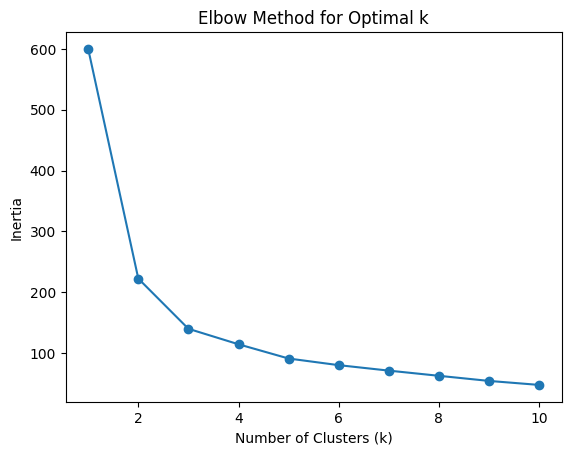

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.45994823920518635


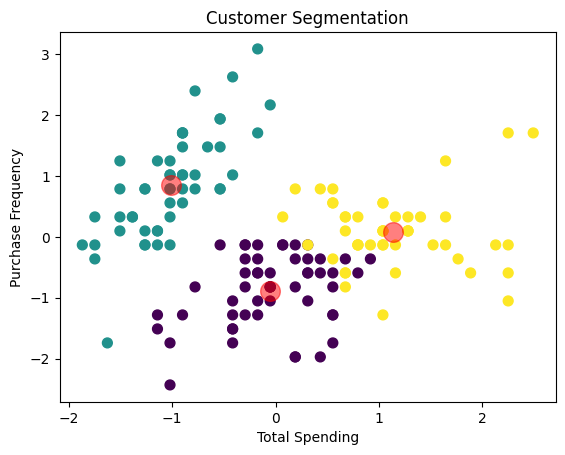

         total_spending  purchase_frequency  days_since_last_purchase  \
Cluster                                                                 
0              5.801887            2.673585                  4.369811   
1              5.006000            3.428000                  1.462000   
2              6.780851            3.095745                  5.510638   

         avg_purchase_value    target  
Cluster                                
0                  1.413208  1.264151  
1                  0.246000  0.000000  
2                  1.972340  1.765957  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Rename columns to simulate customer purchase history
data.rename(columns={
    'sepal length (cm)': 'total_spending',
    'sepal width (cm)': 'purchase_frequency',
    'petal length (cm)': 'days_since_last_purchase',
    'petal width (cm)': 'avg_purchase_value'
}, inplace=True)

# Select relevant features and preprocess
X = data[['total_spending', 'purchase_frequency', 'days_since_last_purchase', 'avg_purchase_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal K using the Elbow Method (same as previous example)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering (using k=3 based on Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=0)
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score (to assess cluster quality)
silhouette_avg = silhouette_score(X_scaled, data["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize (pick two features for 2D plot)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("Customer Segmentation")
plt.xlabel("Total Spending")
plt.ylabel("Purchase Frequency")
plt.show()

# Analyze and interpret the clusters
print(data.groupby("Cluster").mean())
# ... Further analysis and visualization


Mean Squared Error: 3396389340.858873
R-squared: 0.5081866303840366


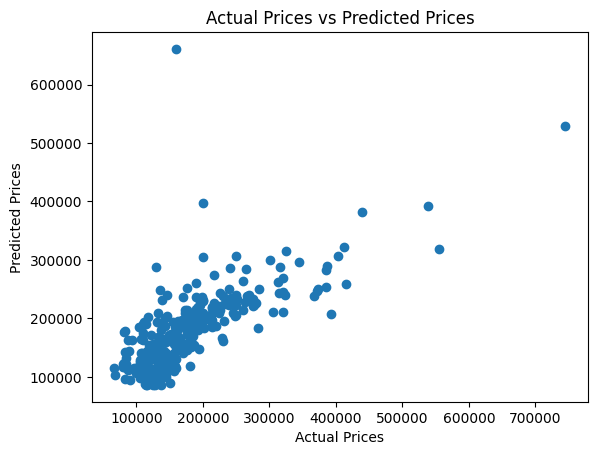

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = pd.read_csv("/content/train[1].csv")



# Select relevant features
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]  # Square footage, bedrooms, and full bathrooms
y = data['SalePrice']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()